## Data Mining and Machine Learning
### k-nn applied to digit recognition
### Edgar Acuna
### Marzo 2020

In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
import pandas as pd
from skimage import exposure
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

The original dataset is available at the UCI. We will use a small subset that comes with scikit-learn

In [13]:
# load el MNIST digits dataset
mnist = datasets.load_digits()
print(mnist.data)
print("the number of records is:",len(mnist.data))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
the number of records is: 1797


In [14]:
print(mnist.images.shape)

(1797, 8, 8)


<Figure size 432x288 with 0 Axes>

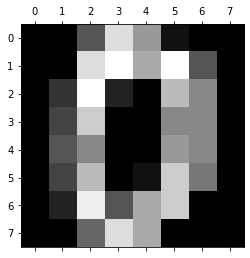

In [5]:
# Graficando  una de las imagenes del digito 0
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(mnist.images[0]) 
plt.show() 

In [6]:
# Training and testing split,
# 75% para training y 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

# Mostrando los tamanos de cada data split
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))
print (trainLabels)


training data points: 1347
testing data points: 450
[5 2 0 ... 2 7 1]


In [7]:
# Trataremos de encontrar por inspeccion el mejor k de acuerdo a la precision que da el  clasificador
kVals = range(1, 30, 2)
accuracies = []

# loop sobre los valores de kVals
for k in range(1, 30, 2):
    # Entrenar el clasificador  con el valor actual de  `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = model.score(testData, testLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)


k=1, accuracy=98.22%
k=3, accuracy=98.67%
k=5, accuracy=99.33%
k=7, accuracy=99.33%
k=9, accuracy=98.67%
k=11, accuracy=98.00%
k=13, accuracy=98.00%
k=15, accuracy=98.22%
k=17, accuracy=98.00%
k=19, accuracy=97.78%
k=21, accuracy=97.78%
k=23, accuracy=97.78%
k=25, accuracy=97.33%
k=27, accuracy=97.11%
k=29, accuracy=97.11%


In [8]:
# Hallando el k para el cual la precision es mayor
i = np.argmax(accuracies)
print("k=%d gave the best accuracy %.2f%%" % (kVals[i],
    accuracies[i] * 100))


k=5 gave the best accuracy 99.33%


In [9]:
# Aplicamos otra vez k-nn pero con el mejor clasificador
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

# Prediciendo los labels del conjunto de prueba
predictions = model.predict(testData)

# Evaluando el rendimiento del clasificador para cada uno de lpos digitos
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

# Algunos digitos son clasificados con 100% de precision


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        55
           5       0.98      0.98      0.98        59
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



The image represents the digit: 5


<Figure size 432x288 with 0 Axes>

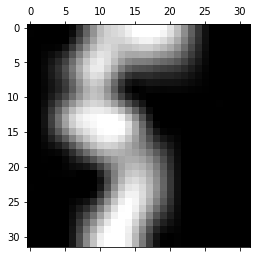

In [10]:
# Cotejando las predicciones contra las imagenes 
# Eligiendo al azar una imagen
i=np.random.randint(0, high=len(testLabels))
image=testData[i].reshape(1,-1)
prediction = model.predict(image)[0]

# Convirtiendo la imagen de un arreglo de dimension 64 a una imagen de dimension 8x8 compatibel con OpenVC
# rescalando luego a una imagen de 32x32 pixels para que se vea mejor
image = image.reshape((8, 8)).astype("uint8")
image = exposure.rescale_intensity(image, out_range=(0, 255))
image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

# Mostrando la prediccion
print("The image represents the digit: {}".format(prediction))
plt.gray() 
plt.matshow(image) 
plt.show() 

In [11]:
#Uncomment this for running knn in the whole dataset
#Reading the original datasets in csv format
#a=pd.read_csv("http://www.pjreddie.com/media/files/mnist_train.csv")
#b=pd.read_csv("http://www.pjreddie.com/media/files/mnist_test.csv")
#model = KNeighborsClassifier(n_neighbors=5)
#a.info()
#b.info()
#trainLabels=a.iloc[:,0]
#trainData=a.iloc[:,1:784]
#testData=b.iloc[:,1:784]
#model.fit(trainData, trainLabels)
# Prediciendo los labels del conjunto de pruebao
#pred = model.predict(testData)
#y=testData=b.iloc[:,0]

In [12]:
#Finding the misclassification error
#error=(y!=pred).mean()
#print( "The misclassification error in the test samples is", error)